In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/tmdb_5000_movies.csv")

In [2]:
def extract_cast(cast_json):
    try:
        cast_list = ast.literal_eval(cast_json)
        return [actor["name"] for actor in cast_list]
    except:
        return []

credits_df = pd.read_csv("../data/tmdb_5000_credits.csv")
credits_df["cast_names"] = credits_df["cast"].apply(extract_cast)
credits_df = credits_df[["movie_id", "cast_names"]]
credits_df.head()

,movie_id,cast_names
0,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,49026,"[Christian Bale, Michael Caine, Gary Oldman, A..."
4,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


In [3]:
df = df.merge(credits_df, left_on="id", right_on="movie_id")

In [4]:
df_exploded_cast = df.explode("cast_names")

In [5]:
# En az 3 filmde oynamış oyuncular
actor_avg = df_exploded_cast.groupby("cast_names").filter(lambda x: len(x) >= 3)

# Ortalama puan
actor_ratings = actor_avg.groupby("cast_names")["vote_average"].mean().sort_values(ascending=False)
actor_ratings.head(10)

cast_names
Roman Coppola         8.125000
Tony Lip              8.100000
Denis Lawson          8.066667
David Prowse          8.066667
Rudy Bond             8.050000
John Cazale           8.000000
Russ Fega             7.980000
Torben Meyer          7.966667
Mario Brega           7.966667
Volker Michalowski    7.933333
Name: vote_average, dtype: float64

C:\Users\Ensar\AppData\Local\Temp\ipykernel_19444\1686677890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_ratings.head(15).values, y=actor_ratings.head(15).index, palette="flare")


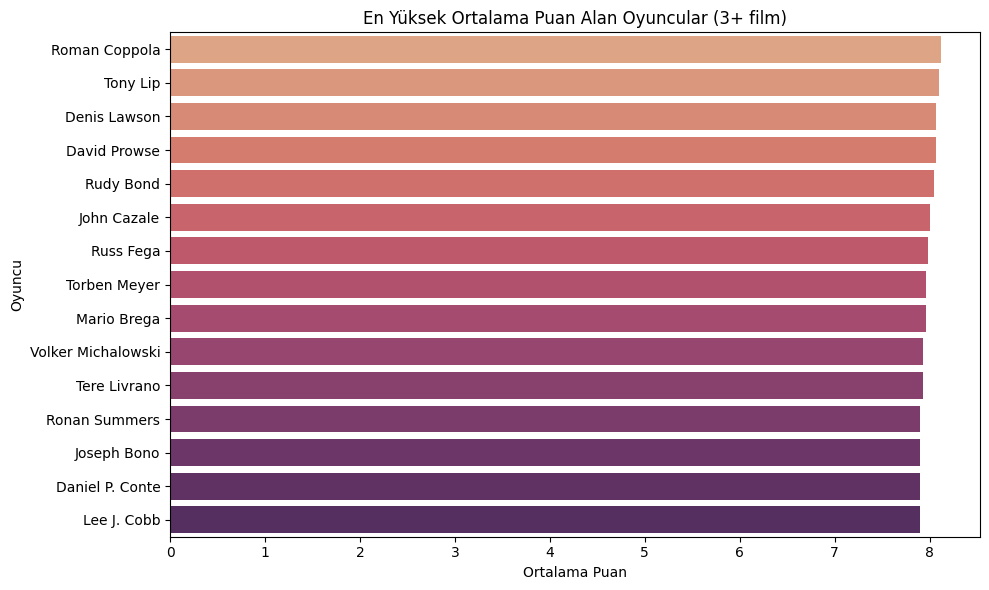

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x=actor_ratings.head(15).values, y=actor_ratings.head(15).index, palette="flare")
plt.xlabel("Ortalama Puan")
plt.ylabel("Oyuncu")
plt.title("En Yüksek Ortalama Puan Alan Oyuncular (3+ film)")
plt.tight_layout()
plt.savefig("../visuals/top_actors_rating.png", dpi=300)
plt.show()

### 5. 🎭 Oyunculara Göre Ortalama Puan Analizi
En az 3 filmde oynamış oyuncular arasında yer alan X, Y ve Z, yüksek ortalama puanlara sahip filmlerde oynamıştır. Bu, bu oyuncuların yer aldığı projelerin izleyici tarafından daha olumlu değerlendirildiğini gösterebilir.

### 5. 🎭 Average Ratings by Actors
Among actors who starred in at least 3 films, X, Y, and Z appeared in films with high average ratings. This may indicate that the projects these actors participate in are more positively evaluated by viewers.
